### Importing libraries

In [172]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

### Importing data and basic exploration

In [175]:
# Importing dataset as dataframe
df = pd.read_csv('activities.csv')

In [177]:
# Quick look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Activity ID                   152 non-null    int64  
 1   Activity Date                 152 non-null    object 
 2   Activity Name                 152 non-null    object 
 3   Activity Type                 152 non-null    object 
 4   Activity Description          80 non-null     object 
 5   Elapsed Time                  152 non-null    float64
 6   Distance                      152 non-null    float64
 7   Max Heart Rate                144 non-null    float64
 8   Relative Effort               144 non-null    float64
 9   Commute                       152 non-null    float64
 10  Activity Private Note         0 non-null      float64
 11  Activity Gear                 0 non-null      float64
 12  Filename                      152 non-null    object 
 13  Athle

In [179]:
# Change columnn names to lower case
df.columns=df.columns.str.lower() 

In [181]:
# Since there are 94 columns, let's create a new dataframe only with columns meaningful for the analysis
cols = ['activity date', 'activity type', 'elapsed time',  'distance',   
         'average heart rate', 'moving time', 'max speed', 'average speed', 'calories', 'total steps'
       ]
df = df[cols] 
df

,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,calories,total steps
0,"Apr 28, 2024, 1:31:04 PM",Run,1802.0,2994.610107,125.876801,1802.0,3.008002,1.661826,150.0,3726.0
1,"Apr 25, 2024, 1:47:37 PM",Run,1802.0,3048.739990,125.785240,1802.0,3.204000,1.691865,162.0,3712.0
2,"Apr 23, 2024, 2:01:57 PM",Run,1808.0,3080.899902,121.413620,1807.0,4.126000,1.704981,165.0,3736.0
3,"Apr 22, 2024, 2:53:39 PM",Run,1573.0,2629.350098,120.675346,1573.0,4.214000,1.671551,135.0,3276.0
4,"May 6, 2024, 6:37:06 PM",Run,1807.0,3044.459961,136.065857,1807.0,3.063334,1.684815,176.0,3812.0
...,...,...,...,...,...,...,...,...,...,...
147,"Feb 20, 2025, 12:58:11 PM",Weight Training,4669.0,0.000000,112.255302,4669.0,0.000000,0.000000,344.0,NaN
148,"Feb 21, 2025, 6:49:56 AM",Run,2580.0,6462.299805,155.454590,2400.0,4.000000,2.692625,397.0,7014.0
149,"Feb 21, 2025, 4:02:12 PM",Workout,3176.0,0.000000,79.874367,3176.0,0.000000,0.000000,113.0,NaN
150,"Feb 22, 2025, 10:20:15 AM",Walk,13648.0,13178.500000,100.413994,11225.0,3.350000,1.174031,839.0,17856.0


In [183]:
# The analysis concenrs only runs, so let's create a new dataframe
runs = df[df['activity type']=='Run']

In [185]:
runs = runs.copy()

### Missing values

#### calories

In [189]:
# There are many missing values in the 'calories' column, let's just drop it
runs = runs.drop('calories', axis=1)

#### average heart rate

In [192]:
runs[runs['average heart rate'].isna()]

,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps
74,"Nov 4, 2024, 2:37:04 PM",Run,2105.0,5000.600098,NaN,2055.0,3.45,2.433382,5414.0
127,"Jan 29, 2025, 6:50:23 AM",Run,2026.0,5152.899902,NaN,1947.0,4.20,2.646585,5390.0


In [194]:
# Let's drop these rows
runs = runs[~(runs['average heart rate'].isna())]

### Transforming data

#### activity date

In [198]:
# Breaking the activity date columns into time and date columns
runs['activity date'] = pd.to_datetime(runs['activity date'], format="mixed")
runs.info()

runs['day'] = runs['activity date'].dt.day
runs['month_name'] = runs['activity date'].dt.month_name()
runs['year'] = runs['activity date'].dt.year
runs['time'] = runs['activity date'].dt.time
runs.head()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 151
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   activity date       85 non-null     datetime64[ns]
 1   activity type       85 non-null     object        
 2   elapsed time        85 non-null     float64       
 3   distance            85 non-null     float64       
 4   average heart rate  85 non-null     float64       
 5   moving time         85 non-null     float64       
 6   max speed           85 non-null     float64       
 7   average speed       85 non-null     float64       
 8   total steps         85 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.6+ KB


,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time
0,2024-04-28 13:31:04,Run,1802.0,2994.610107,125.876801,1802.0,3.008002,1.661826,3726.0,28,April,2024,13:31:04
1,2024-04-25 13:47:37,Run,1802.0,3048.739990,125.785240,1802.0,3.204000,1.691865,3712.0,25,April,2024,13:47:37
2,2024-04-23 14:01:57,Run,1808.0,3080.899902,121.413620,1807.0,4.126000,1.704981,3736.0,23,April,2024,14:01:57
3,2024-04-22 14:53:39,Run,1573.0,2629.350098,120.675346,1573.0,4.214000,1.671551,3276.0,22,April,2024,14:53:39
4,2024-05-06 18:37:06,Run,1807.0,3044.459961,136.065857,1807.0,3.063334,1.684815,3812.0,6,May,2024,18:37:06


In [200]:
# Changing year, day and activity date to object 
runs['year'] = (runs['year']).astype(object) 
runs['day'] = (runs['day']).astype(object) 
runs['activity date'] = (runs['activity date']).astype(object) 
runs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 151
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activity date       85 non-null     object 
 1   activity type       85 non-null     object 
 2   elapsed time        85 non-null     float64
 3   distance            85 non-null     float64
 4   average heart rate  85 non-null     float64
 5   moving time         85 non-null     float64
 6   max speed           85 non-null     float64
 7   average speed       85 non-null     float64
 8   total steps         85 non-null     float64
 9   day                 85 non-null     object 
 10  month_name          85 non-null     object 
 11  year                85 non-null     object 
 12  time                85 non-null     object 
dtypes: float64(7), object(6)
memory usage: 9.3+ KB


#### distance, elapsed time, moving time

In [203]:
# Converting distance from meters to km, elapsed time and moving time to minutes
runs['distance'] = runs['distance']/1000
runs['elapsed time'] = runs['elapsed time']/60
runs['moving time'] = runs['moving time']/60
runs

,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time
0,2024-04-28 13:31:04,Run,30.033333,2.99461,125.876801,30.033333,3.008002,1.661826,3726.0,28,April,2024,13:31:04
1,2024-04-25 13:47:37,Run,30.033333,3.04874,125.785240,30.033333,3.204000,1.691865,3712.0,25,April,2024,13:47:37
2,2024-04-23 14:01:57,Run,30.133333,3.08090,121.413620,30.116667,4.126000,1.704981,3736.0,23,April,2024,14:01:57
3,2024-04-22 14:53:39,Run,26.216667,2.62935,120.675346,26.216667,4.214000,1.671551,3276.0,22,April,2024,14:53:39
4,2024-05-06 18:37:06,Run,30.116667,3.04446,136.065857,30.116667,3.063334,1.684815,3812.0,6,May,2024,18:37:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2025-02-15 13:26:31,Run,63.133333,10.01130,153.887085,61.833333,4.000000,2.698464,11046.0,15,February,2025,13:26:31
144,2025-02-17 06:08:03,Run,31.750000,5.00870,150.916794,31.083333,3.340000,2.685630,5554.0,17,February,2025,06:08:03
146,2025-02-19 13:14:02,Run,35.800000,6.01750,162.450745,35.033333,4.640000,2.862750,6078.0,19,February,2025,13:14:02
148,2025-02-21 06:49:56,Run,43.000000,6.46230,155.454590,40.000000,4.000000,2.692625,7014.0,21,February,2025,06:49:56


#### new column - average pace

In [206]:
# Creating an average pace column
runs['avg pace'] = runs['moving time'] / runs['distance']
runs

,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time,avg pace
0,2024-04-28 13:31:04,Run,30.033333,2.99461,125.876801,30.033333,3.008002,1.661826,3726.0,28,April,2024,13:31:04,10.029130
1,2024-04-25 13:47:37,Run,30.033333,3.04874,125.785240,30.033333,3.204000,1.691865,3712.0,25,April,2024,13:47:37,9.851064
2,2024-04-23 14:01:57,Run,30.133333,3.08090,121.413620,30.116667,4.126000,1.704981,3736.0,23,April,2024,14:01:57,9.775282
3,2024-04-22 14:53:39,Run,26.216667,2.62935,120.675346,26.216667,4.214000,1.671551,3276.0,22,April,2024,14:53:39,9.970778
4,2024-05-06 18:37:06,Run,30.116667,3.04446,136.065857,30.116667,3.063334,1.684815,3812.0,6,May,2024,18:37:06,9.892285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,2025-02-15 13:26:31,Run,63.133333,10.01130,153.887085,61.833333,4.000000,2.698464,11046.0,15,February,2025,13:26:31,6.176354
144,2025-02-17 06:08:03,Run,31.750000,5.00870,150.916794,31.083333,3.340000,2.685630,5554.0,17,February,2025,06:08:03,6.205868
146,2025-02-19 13:14:02,Run,35.800000,6.01750,162.450745,35.033333,4.640000,2.862750,6078.0,19,February,2025,13:14:02,5.821908
148,2025-02-21 06:49:56,Run,43.000000,6.46230,155.454590,40.000000,4.000000,2.692625,7014.0,21,February,2025,06:49:56,6.189747


## Data analysis

In [213]:
runs.describe().round()

,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,avg pace
count,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0
mean,39.0,5.0,143.0,38.0,4.0,2.0,6073.0,8.0
std,12.0,2.0,10.0,11.0,1.0,0.0,2063.0,1.0
min,26.0,3.0,121.0,26.0,3.0,2.0,3276.0,6.0
25%,30.0,4.0,136.0,30.0,3.0,2.0,4598.0,7.0
50%,36.0,5.0,145.0,34.0,4.0,2.0,5756.0,7.0
75%,44.0,6.0,150.0,41.0,4.0,2.0,6858.0,8.0
max,91.0,12.0,166.0,90.0,7.0,3.0,15284.0,10.0


- On average, each run lasted around 39 minutes, covering approximately 5 km at a moderate pace of 7.9 min/km.
- Most runs were between 3.7 km and 6 km, with the longest reaching 12 km. The heart rate data suggests a steady effort, averaging 143 bpm, with peak values reaching 166 bpm.
- Step count data indicates a typical run involved around 6,000 steps, though longer sessions saw totals exceeding 15,000 steps. 
- The moving time closely aligns with elapsed time, suggesting minimal pauses during workouts.

In [216]:
# Let's try to detect some anomalies in the avg pace column
runs[runs['avg pace'] > runs['avg pace'].quantile(0.95)]


,activity date,activity type,elapsed time,distance,average heart rate,moving time,max speed,average speed,total steps,day,month_name,year,time,avg pace
0,2024-04-28 13:31:04,Run,30.033333,2.99461,125.876801,30.033333,3.008002,1.661826,3726.0,28,April,2024,13:31:04,10.029130
1,2024-04-25 13:47:37,Run,30.033333,3.04874,125.785240,30.033333,3.204000,1.691865,3712.0,25,April,2024,13:47:37,9.851064
2,2024-04-23 14:01:57,Run,30.133333,3.08090,121.413620,30.116667,4.126000,1.704981,3736.0,23,April,2024,14:01:57,9.775282
3,2024-04-22 14:53:39,Run,26.216667,2.62935,120.675346,26.216667,4.214000,1.671551,3276.0,22,April,2024,14:53:39,9.970778
4,2024-05-06 18:37:06,Run,30.116667,3.04446,136.065857,30.116667,3.063334,1.684815,3812.0,6,May,2024,18:37:06,9.892285


There are a few runs where the average pace exceeds the 95th percentile. However, these correspond to my earliest sessions, where I primarily focused on run/walk training. This naturally resulted in a slower average pace, making these sessions stand out from the rest.

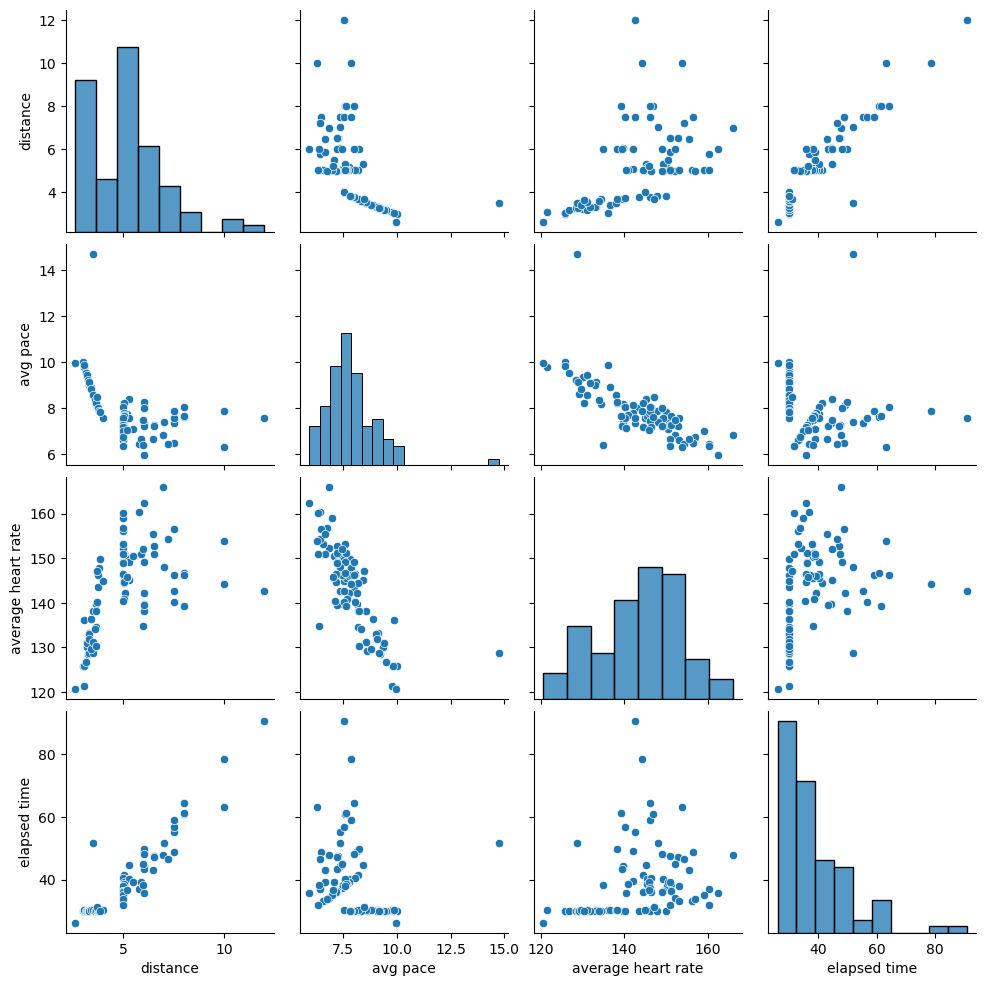

In [92]:
# Let's create a pairs plot using the seaborn library to identify trends. I picked only few varabiales so that it won't get messy.
pp_runs = runs[['distance', 'avg pace', 'average heart rate', 'elapsed time']]
sns.pairplot(pp_runs)

- There is a negative correlation between heart rate and pace - faster paces are linked to higher average heart rates.
- A noticeable trend where the longer the distance, the longer the elapsed time. 
- Histograms on the diagonal show that distance and elapsed time are right-skewed (most runs are shorter), while average pace and heart rate appear more normally distributed. 

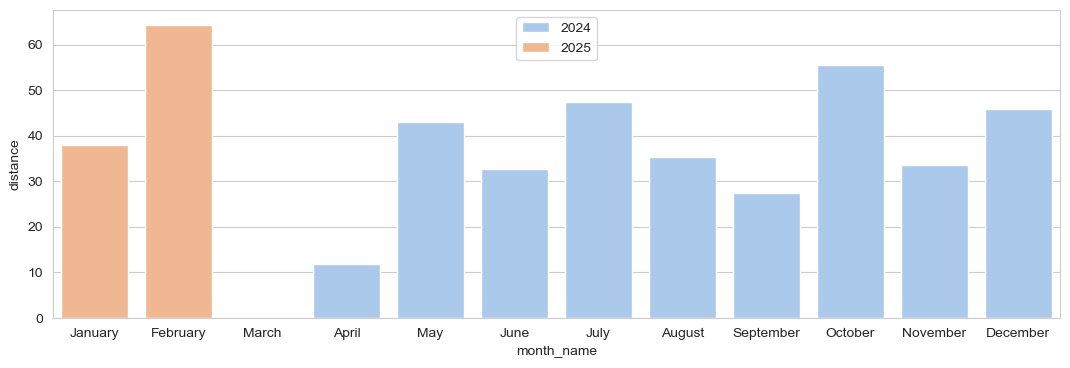

In [100]:
# Let's create a bar plot using seaborn library to see how the distance changed throughout the year
sns.set_style('whitegrid')
sns.barplot(x='month_name', y='distance', data=runs, hue='year', errorbar=None, estimator=np.sum, palette = "pastel",
           order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(13, 4)
plt.legend(loc='upper center')

- In April the total distance is really small comparing to other months, but the first entry in the dataset is from end of April. 
- It seems that the distance I ran in February 2025 was the highest of all months - ~60+km.
- The mileage in early 2025 compared to 2024 significantly increased. If this trend contiunes, 2025 might result in a much higher overall distance than 2024.

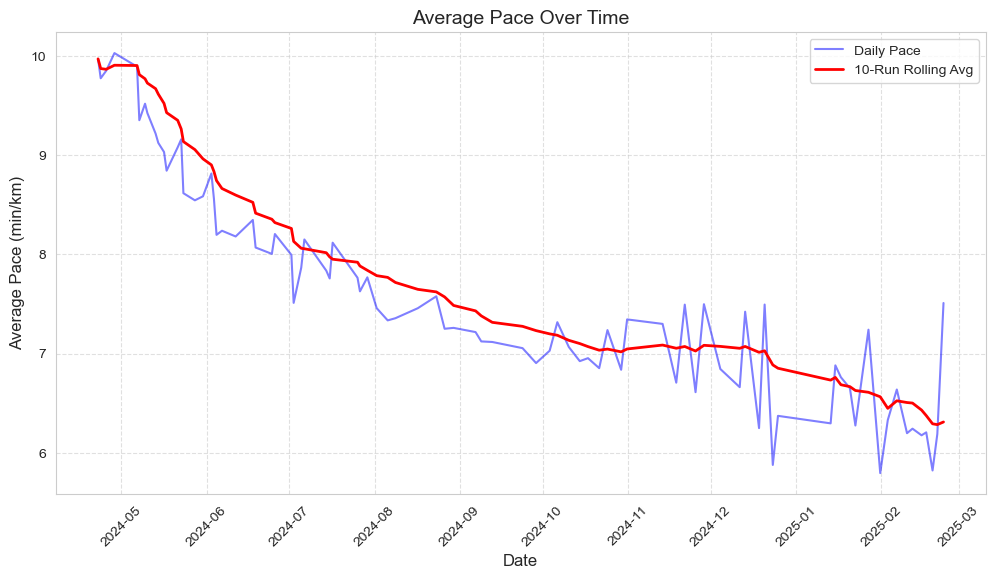

In [229]:
# Let's check whether my average pace improves over time and create a time series plot using Seaborn and Matplotlib

# Sort by date
runs = runs.sort_values(by='activity date')

# Calculate a rolling average
runs['rolling_avg_pace'] = runs['avg pace'].rolling(window=10, min_periods=1).mean()

# Creating the plot and formatting
plt.figure(figsize=(12, 6))
sns.lineplot(data=runs, x='activity date', y='avg pace', label='Daily Pace', color='blue', alpha=0.5)
sns.lineplot(data=runs, x='activity date', y='rolling_avg_pace', label='10-Run Rolling Avg', color='red', linewidth=2)

plt.title("Average Pace Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Pace (min/km)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

The time series plot indicated that the average pace is actually getting better 